In [25]:
import tensorflow as tf

In [26]:
#other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-06-12 15:02:21--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-06-12 15:02:21 (41.3 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [29]:
#load in the data
data=pd.read_csv('moore.csv',header=None).to_numpy()#converting to numpy array

In [30]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [7]:
x=data[:,0].reshape(-1,1)#making N x D matrix
y=data[:,1]

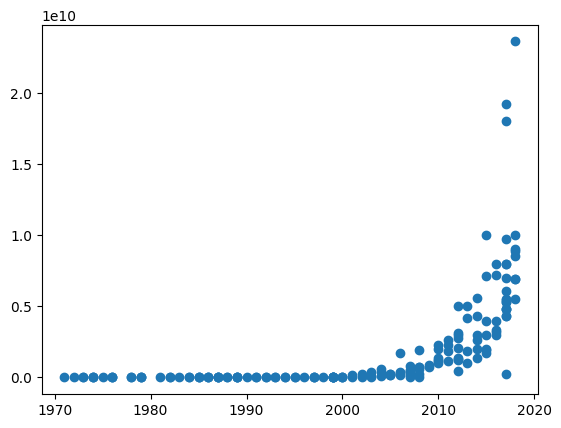

In [8]:
#plot the data
plt.scatter(x,y)#later growth are large that makes earlier changes look like 0s

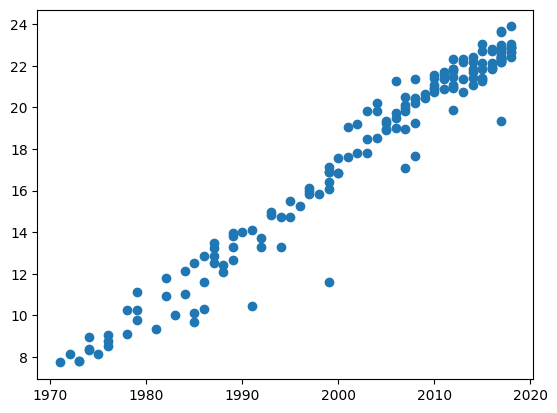

In [9]:
y=np.log(y)
plt.scatter(x,y)

In [10]:
x =x-x.mean()

In [11]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss="mse",
)

In [13]:
def schedule(epoch,lr):
  if epoch >=50 :
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [14]:
r=model.fit(x,y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 330.2483 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 300.5115 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 238.3910 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 227.4206 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 191.6320 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 153.7968 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 86.8077 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 72.9976 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 66.7123 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 64.1032 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 3

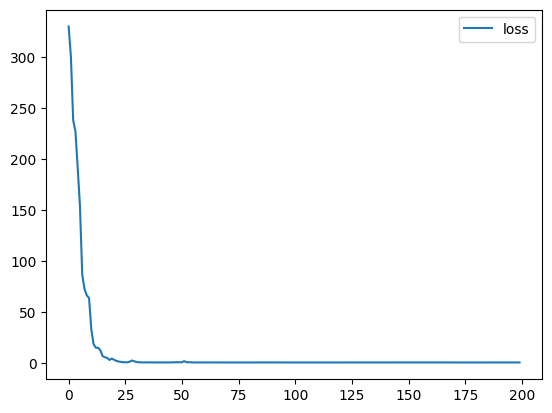

In [17]:
#plot the loss
plt.plot(r.history['loss'],label='loss')
plt.legend();

In [18]:
model.layers

In [19]:
model.layers[0].get_weights()

[array([[0.34653828]], dtype=float32), array([17.755207], dtype=float32)]

In [20]:
a=model.layers[0].get_weights()[0][0,0]

In [21]:
a

0.34653828

In [22]:
print("Time to double:",np.log(2)/a)

Time to double: 2.000203814713704


Making predictions

6/6 [==============================] - 0s 2ms/step


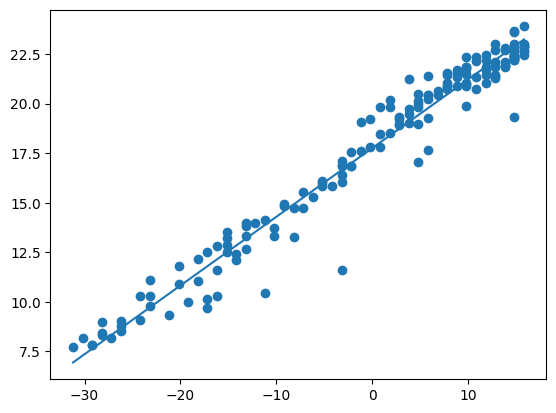

In [23]:
# make sure the line fits our data
predict= model.predict(x).flatten()
plt.scatter(x,y)
plt.plot(x,predict)

In [32]:
# manual calculation
#get the weights
w,b =model.layers[0].get_weights()
#Reshape X because we flattened it agin earlier
X=x.reshape(-1,1)
#(N x 1) x (1x1)+(1)-->(Nx1)
predict1=(X.dot(w)+b).flatten()

#dont use == for floating points
np.allclose(predict,predict1)

True